In [1]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 14.07 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [15]:
!unrar x "/content/Labels.rar" "/content/YoloV3/data/customdata/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Labels.rar

Creating    /content/YoloV3/data/customdata/Labels                    OK
Extracting  /content/YoloV3/data/customdata/Labels/D_1.txt                 0%  OK 
Extracting  /content/YoloV3/data/customdata/Labels/D_10.txt                0%  OK 
Extracting  /content/YoloV3/data/customdata/Labels/D_100.txt               0%  OK 
Extracting  /content/YoloV3/data/customdata/Labels/D_101.txt               0%  OK 
Extracting  /content/YoloV3/data/customdata/Labels/D_102.txt               0%  OK 
Extracting  /content/YoloV3/data/customdata/Labels/D_103.txt               1%  OK 
Extracting  /content/YoloV3/data/customdata/Labels/D_104.txt               1%  OK 
Extracting  /content/YoloV3/data/customdata/Labels/D_105.txt               1%  OK 
Extracting  /content/YoloV3/data/customdata/Labels/D_106.txt               2%

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [1]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [2]:
ls

 gdrive/   Images.rar   Labels.rar  'Rar file'/   sample_data/   YoloV3/


In [3]:
cd YoloV3/

/content/YoloV3


In [4]:
!ls

 annotation_tool   output	  results.txt	    train_batch0.png    weights
 cfg		   __pycache__	  runs		    train.py
 data		   README.md	  test_batch0.png  'ubdivisions=1'
 detect.py	   results.json   test.py	    utils
 models.py	   results.png	  ting		    vim.exe.stackdump


In [5]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-24 17:34:50.892214: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 4870.30it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 120.70it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00,

In [8]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-24 17:46:57.631435: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (480 found, 0 missing, 18 empty, 0 duplicate, for 498 images): 100% 498/498 [00:00<00:00, 5156.27it/s]
Caching images (0.3GB): 100% 498/498 [00:01<00:00, 328.24it/s]
Reading image shapes: 100% 498/498 [00:00<00:00, 6746.43it/s]
Caching labels (480 foun

In [10]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/498 data/customdata/images/D_1.jpg: 512x512 1 Shinchans, Done. (0.020s)
image 2/498 data/customdata/images/D_10.jpg: 512x512 1 Shinchans, Done. (0.020s)
image 3/498 data/customdata/images/D_100.jpg: 512x384 1 Shinchans, Done. (0.020s)
image 4/498 data/customdata/images/D_101.jpg: 512x512 1 Shinchans, Done. (0.022s)
image 5/498 data/customdata/images/D_102.jpg: 512x384 1 Shinchans, Done. (0.020s)
image 6/498 data/customdata/images/D_103.jpg: 512x448 4 Shinchans, Done. (0.021s)
image 7/498 data/customdat

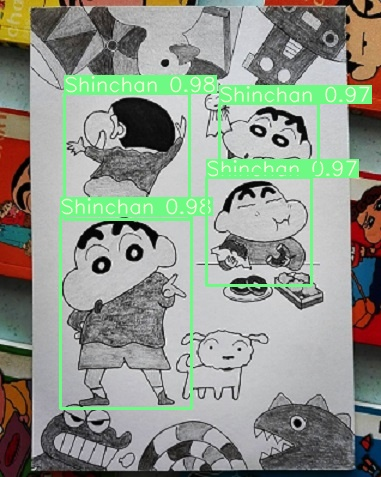

In [13]:
Image(filename='out_out/D_103.jpg', width=600)

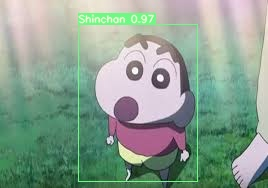

In [16]:
Image(filename='out_out/V_42.jpg', width=600)

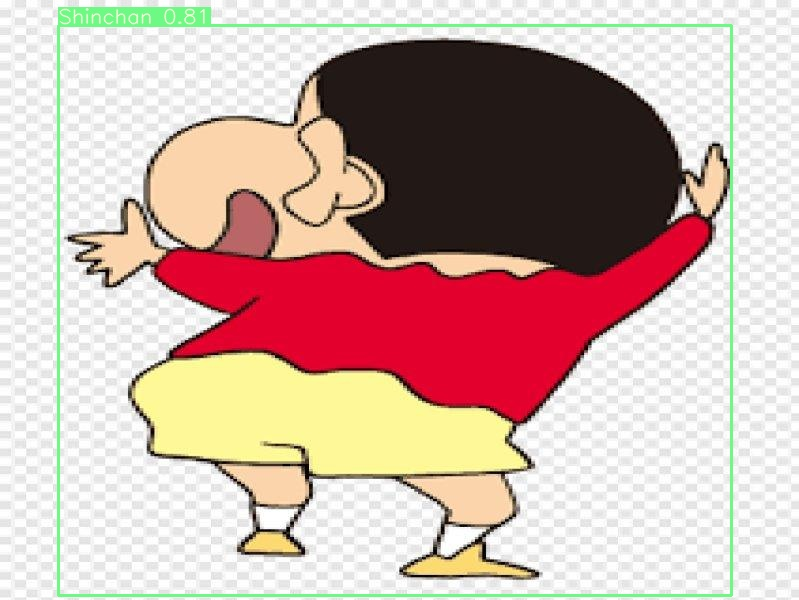

In [17]:
Image(filename='out_out/U_95.jpg', width=600)

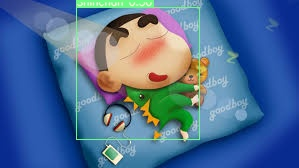

In [21]:
Image(filename='out_out/S_30.jpg', width=600)